## Neural network - MLP

In [97]:
import pandas as pd
import scipy.io as sio
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import numpy as np
%matplotlib inline

In [98]:
data = sio.loadmat('ex3data1.mat')

In [99]:
dataFeatures = data['X']
dataClasses = data['T']

In [100]:
# Spliting Train and Test
X_temp, X_test, y_temp, y_test = train_test_split(dataFeatures, dataClasses, test_size=0.10, random_state=4)
# Spliting Train and Validation
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.111)

In [101]:
print("Tamanhos Datasets - Treino: {} / Validação: {} / Teste: {}".format(len(X_train), len(X_valid), len(X_test)))

Tamanhos Datasets - Treino: 4000 / Validação: 500 / Teste: 500


In [102]:
l_rate = 0.3
epochs = 300

model = MLPClassifier(activation='logistic', learning_rate='constant', learning_rate_init=l_rate, max_iter=1, warm_start=True)

sumErrorByEpochTrain = []
sumErrorByEpochValid = []

for epoch in range(1, epochs+1):
    
    model = model.fit(X_train, y_train)
    
    predictedTrain = model.predict(X_train)
    
    sumErrorTrain = ((y_train - predictedTrain)**2).sum()
    sumErrorByEpochTrain.append(sumErrorTrain)
#     print("Treino: Epoca {} - SumError: {}".format(epoch, sumErrorTrain))
    
    predictedValid = model.predict(X_valid)
    
    sumErrorValid = ((y_valid - predictedValid)**2).sum()
    sumErrorByEpochValid.append(sumErrorValid)
#     print("Validação: Epoca {} - SumError: {}".format(epoch, sumErrorValid))

/home/holandajunior/Environment/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


### Gráfico Época x Erro Quadrático

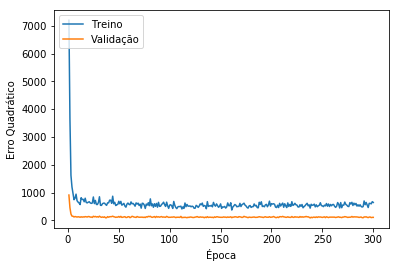

In [103]:
plt.plot(range(1,epochs+1), sumErrorByEpochTrain)
plt.plot(range(1,epochs+1), sumErrorByEpochValid)
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.xlabel('Época')
plt.ylabel('Erro Quadrático')

### O gráfico acima demonstra que o modelo está em constante aprendizado, dado que para cada época o erro quadrático resultante é menor. Importante ressaltar que o erro quadrático do conjunto de validação segue o mesmo comportamento do de treino. Entende-se então que o modelo está aprendendo e generalizando bem, dado que não houve overfitting, pois o erro do conjunto de validação não volta a piorar

### Erro de classificação para o conjunto de teste

In [104]:
score = model.score(X_test, y_test)
print("Erro de classificação: {}".format( 1 - score ))

Erro de classificação: 0.15400000000000003


### Com o erro em 15%, percebemos que o modelo teve um ótimo aprendizado, com cerca de 85% de acertos.